In [1]:
import pandas as pd
from GOTools.grpgo import mk_goSemSim_mtx, topgrp_goids, group_go_overlap_gosim, group_go_rate, split_cluster

In [2]:
go = pd.read_csv('./go.csv')
go.shape
go.head()

ID                                              label  \
0  GO:0040037  negative regulation of fibroblast growth facto...   
1  GO:0009968         negative regulation of signal transduction   
2  GO:0050789                   regulation of biological process   
3  GO:0065007                              biological regulation   
4  GO:0048585        negative regulation of response to stimulus   

                                               genes  number_in_list  \
0                             SPRY3;SPRY1;THBS1;APLN               4   
1  ERRFI1;THY1;THBS1;LBH;DUSP10;SOCS1;SESN1;CHAC1...              27   
2  ERRFI1;KCNG3;KCNG4;CSF3R;CD80;FAM13A;SLC4A1;PL...             140   
3  ERRFI1;KCNG3;KCNG4;CSF3R;CD80;FAM13A;SLC4A1;PL...             151   
4  ERRFI1;SEMA7A;SEMA3D;WFDC1;THY1;THBS1;LBH;DUSP...              32   

   number_in_reference  fold_enrichment    expected    pvalue       fdr  \
0                   17        17.066026    0.234384  0.000167  0.039777   
1                  810         2.417687   11.167698  0.000037  0.016683   
2                 7930         1.280490  109.333146  0.000099  0.027503   
3                 8509         1.287122  117.315982  0.000020  0.010911   
4                 1043         2.225292   14.380135  0.000030  0.014679   

   level                                      group              top_group  
0      0                      biological regulation  biological regulation  
1      1                      biological regulation  biological regulation  
2      4                      biological regulation  biological regulation  
3      5                      biological regulation  biological regulation  
4      2  negative regulation of biological process  biological regulation


************************************************************************************************************
       Package A-DaGO-Fun: A General Gene Ontology Semantic Similarity based Functional Analysis Tool
           Computational Biology Group (CBIO) & African institute for Mathematical Sciences (AIMS)
                        Distributed under free software (GNU General Public Licence) 
                             (c) 2015 GPL, Verson 15.1, All rights reserved.
************************************************************************************************************

Calculating Functional similarity scores on Fri May  8 23:17:54 2020


Calculating protein pairwise functional similarity scores accomplished on Fri May  8 23:18:00 2020
Total time elapsed is approximately: 6.012925624847412 seconds


************************************************************************************************************



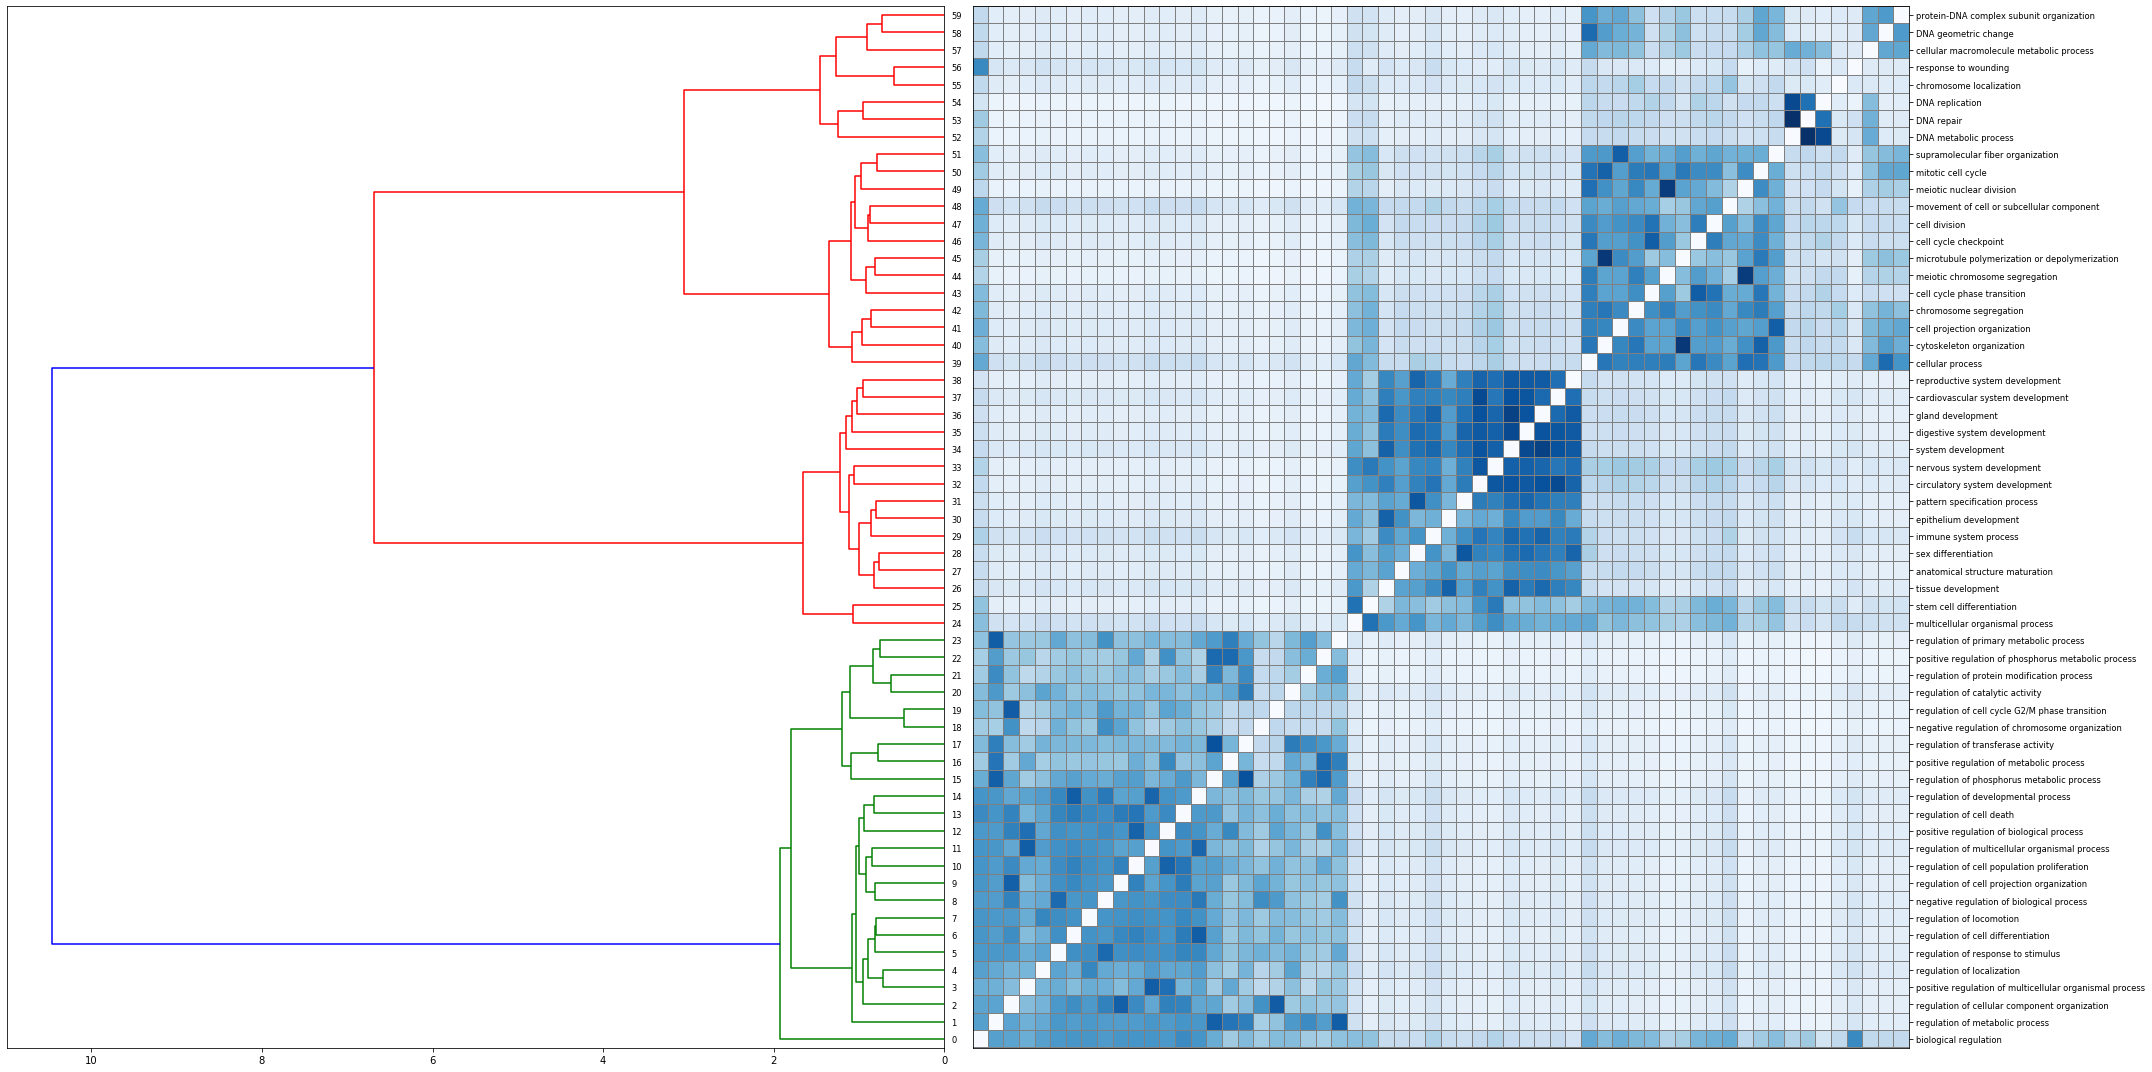

In [6]:
group_go_overlap_gosim('./analysis_3755genes.json', 'group_gosim_wbma', method='wbma')

<Numbers of GO Terms>:  60
<Comparing gene sets to each other ...>
<Calculating overlap significance by hypergeom test ...>
<Done>


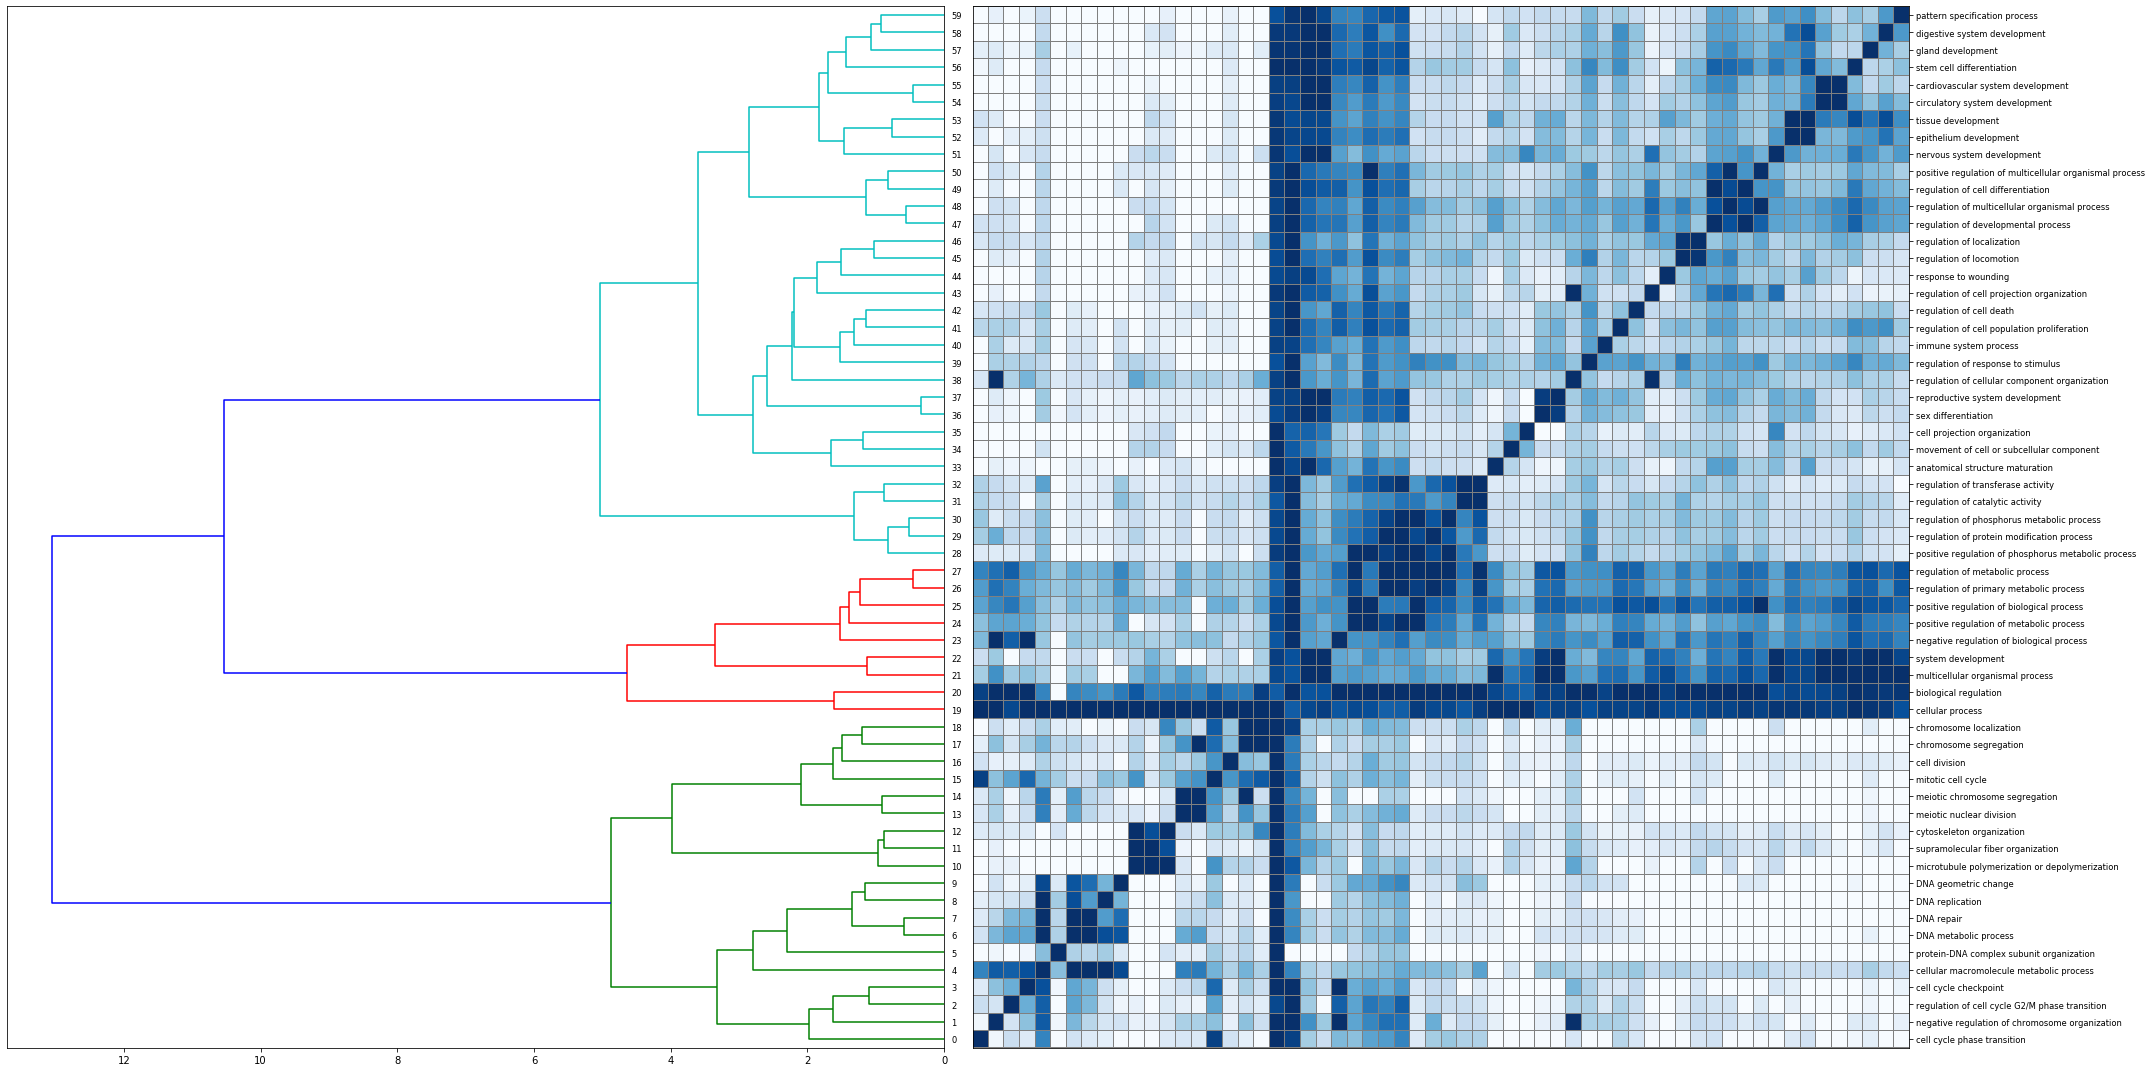

In [4]:
group_go_rate('./analysis_3755genes.json', './group_go_rate', 3755)

In [11]:
go_rate = pd.read_csv('./group_go_rate/go_overlap_rate.csv',index_col=0)
go_sim = pd.read_csv('./group_gosim_wbma/go_sim.csv',index_col=0)

In [15]:
rate_sim_mtx = pd.concat([go_rate, go_sim], axis=1)
rate_sim_mtx.shape

(60, 120)

In [18]:
import seaborn as sns

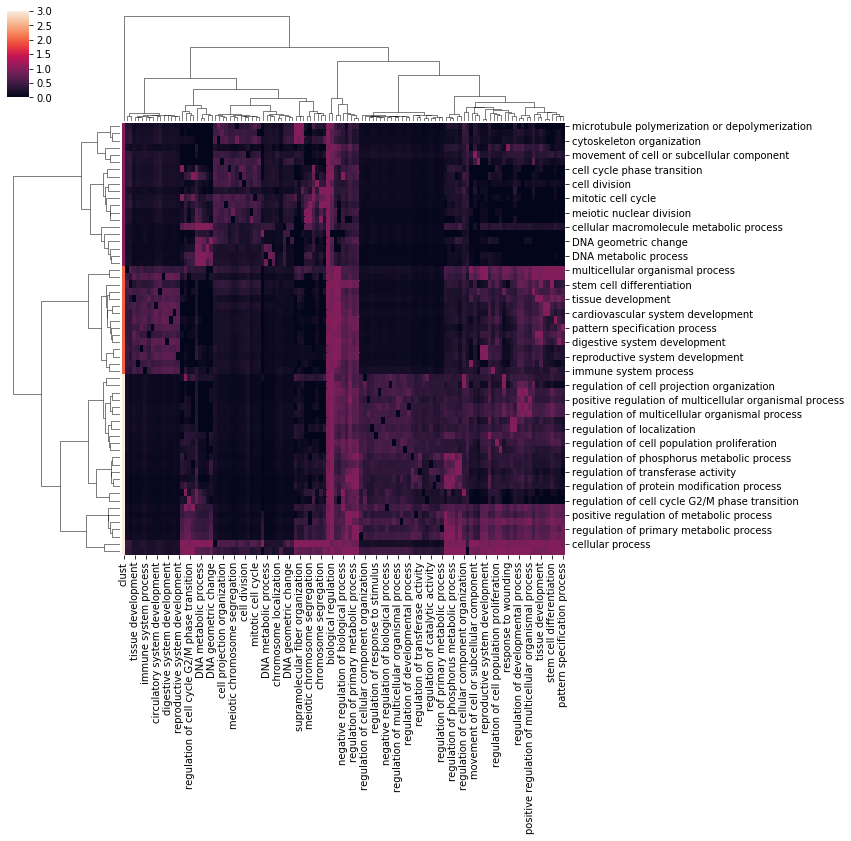

In [20]:
sns.clustermap(rate_sim_mtx, method='ward')

In [11]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from GOTools.grpgo import mk_goSemSim_mtx, topgrp_goids

In [18]:
go = pd.read_csv('./group_gosim/go.csv')
topgrp = topgrp_goids(go)
dist = mk_goSemSim_mtx(topgrp, method='wbma', res_mtx_type='condensed')


************************************************************************************************************
       Package A-DaGO-Fun: A General Gene Ontology Semantic Similarity based Functional Analysis Tool
           Computational Biology Group (CBIO) & African institute for Mathematical Sciences (AIMS)
                        Distributed under free software (GNU General Public Licence) 
                             (c) 2015 GPL, Verson 15.1, All rights reserved.
************************************************************************************************************

Calculating Functional similarity scores on Fri May  8 22:24:43 2020


Calculating protein pairwise functional similarity scores accomplished on Fri May  8 22:24:49 2020
Total time elapsed is approximately: 6.869680643081665 seconds


************************************************************************************************************



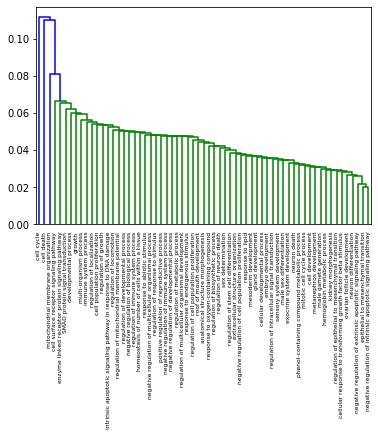

In [20]:
lnk = linkage(dist['wbma'])
n = [dist.loc[0, 'goSet1']] + dist[dist['goSet1'] == dist.loc[0, 'goSet1']]['goSet2'].tolist()
dn = dendrogram(lnk, labels=n)

In [11]:
dist = mk_goSemSim_mtx(t)


************************************************************************************************************
       Package A-DaGO-Fun: A General Gene Ontology Semantic Similarity based Functional Analysis Tool
           Computational Biology Group (CBIO) & African institute for Mathematical Sciences (AIMS)
                        Distributed under free software (GNU General Public Licence) 
                             (c) 2015 GPL, Verson 15.1, All rights reserved.
************************************************************************************************************

Calculating Functional similarity scores on Fri May  8 16:52:48 2020


Calculating protein pairwise functional similarity scores accomplished on Fri May  8 16:52:48 2020
Total time elapsed is approximately: 0.9414849281311035 seconds


************************************************************************************************************



In [12]:
from scipy.spatial.distance import squareform

In [21]:
dist.iloc[:18]

goSet1  ...     ubma
0   anatomical structure morphogenesis  ...  0.00000
1   anatomical structure morphogenesis  ...  0.08164
2   anatomical structure morphogenesis  ...  0.22210
3   anatomical structure morphogenesis  ...  0.00000
4   anatomical structure morphogenesis  ...  0.00000
5   anatomical structure morphogenesis  ...  0.00000
6   anatomical structure morphogenesis  ...  0.09457
7   anatomical structure morphogenesis  ...  0.00000
8   anatomical structure morphogenesis  ...  0.00000
9   anatomical structure morphogenesis  ...  0.00000
10  anatomical structure morphogenesis  ...  0.00000
11  anatomical structure morphogenesis  ...  0.00000
12  anatomical structure morphogenesis  ...  0.00000
13  anatomical structure morphogenesis  ...  0.00000
14  anatomical structure morphogenesis  ...  0.00000
15  anatomical structure morphogenesis  ...  0.06456
16  anatomical structure morphogenesis  ...  0.33188
17               biological regulation  ...  0.00000

[18 rows x 3 columns]

In [32]:
n = [dist.loc[0, 'goSet1']] + dist[dist['goSet1'] == dist.loc[0, 'goSet1']]['goSet2'].tolist()
t1 = pd.DataFrame(squareform(dist['ubma']), index=n, columns=n)

dist[dist.apply(lambda x: t1.loc[x['goSet1'], x['goSet2']] != x['ubma'], axis=1)]

Empty DataFrame
Columns: [goSet1, goSet2, ubma]
Index: []